In [ ]:
import pandas as pd
import numpy as np

Download dados anotados (todos os 236 docs) entre as 6 classes de interesse + classe outros

In [ ]:
! gdown --id 16VsQAJZzDY3cff07EFaitSpE-oCUcQnC
! gdown --id 13L-RAEdaJzhR_K1zSUb491zynQFkT8eh

**Download dados criados artificialmente (augmented data)**

In [ ]:
! gdown --id 11oSFoZRYGuMs-7f4irbGMV3hgQ5Z-QGC
! gdown --id 1bYlRguuHEkoxUBfhgBJlmtcN3_yehrnN
! gdown --id 1ZaAgn32B5vGTZJgL3gG4cN0e1vf1foDp
! gdown --id 1mjEE_T5rafvs7mlJ8RLsK6MedY9CZE4d

**Carregamento dos dados**

In [ ]:
data = pd.read_json('output_anotacoes.jsonl', lines=True)
data

In [ ]:
## carregamento classe outros

import json

with open('./outros_all.json', 'r') as file:
  outros_data = json.load(file)

outros = []
for sent in outros_data:
  outros.append((sent, 6))

In [ ]:
## carregamento dados criados (Augmented)

with open('./clausula_atraso_augmentation.json', 'r') as file:
  clausula_atraso_augmentation = json.load(file)

with open('./local_augmentation.json', 'r') as file:
  local_augmentation = json.load(file)

with open('./prazo_entrega_augmentation.json', 'r') as file:
  prazo_entrega_augmentation = json.load(file)

with open('./prazo_pagamento_augmentation.json', 'r') as file:
  prazo_pagamento_augmentation = json.load(file)

Atribuir uma numeração a cada classe

In [ ]:
def label_to_int(label):
  if(label == 'objeto'):
    return 0
  if(label == 'qualificação tecnica'):
    return 1
  if(label == 'prazo de pagamento'):
    return 2
  if(label == 'clausula de atraso de pagamento'):
    return 3
  if(label == 'prazo de entrega'):
    return 4
  if(label == 'local de entrega / execução do serviço'):
    return 5
  if(label == 'outros'):
    return 6

Separar os dados por classe

In [ ]:
objeto = []
qualificacao_tecnica = []
prazo_pagamento = []
clausula_atraso = []
prazo_entrega = []
local = []

def print_len_classes():
  print("Objeto: ",len(objeto))
  print("Qualificação tecnica: ",len(qualificacao_tecnica))
  print("prazo pagamento: ",len(prazo_pagamento))
  print("clausula atraso: ",len(clausula_atraso))
  print("prazo entrega: ",len(prazo_entrega))
  print("local: ",len(local))
  print("outros: ", len(outros))
  print("Objeto sem repetições: ",len(set(objeto)))
  print("Qualificação tecnica sem repetições: ",len(set(qualificacao_tecnica)))
  print("prazo pagamento sem repetições: ",len(set(prazo_pagamento)))
  print("clausula atraso sem repetições: ",len(set(clausula_atraso)))
  print("prazo entrega sem repetições: ",len(set(prazo_entrega)))
  print("local sem repetições: ",len(set(local)))
  print("outros sem repetiçao: ", len(set(outros)))


In [ ]:
def add_to_right_array(elem, label):
  if(label == 0):
    objeto.append((elem, label))
  if(label == 1):
    qualificacao_tecnica.append((elem, label))
  if(label == 2):
    prazo_pagamento.append((elem, label))
  if(label == 3):
    clausula_atraso.append((elem, label))
  if(label == 4):
    prazo_entrega.append((elem, label))
  if(label == 5):
    local.append((elem, label))

In [ ]:
for element in data.values.tolist():
  for lab in element[2]:
    indexInit = int(lab[0])
    indexFinal = int(lab[1])
    label = label_to_int(lab[2])

    if(type(element[1]) == type('str')):
      add_to_right_array(element[1][indexInit:indexFinal], label)
    else:
      add_to_right_array(element[3][indexInit:indexFinal], label)
    
    

In [ ]:
len(outros)

16411

In [ ]:
print_len_classes()

Objeto:  455
Qualificação tecnica:  860
prazo pagamento:  263
clausula atraso:  153
prazo entrega:  195
local:  151
outros:  16411
Objeto sem repetições:  403
Qualificação tecnica sem repetições:  644
prazo pagamento sem repetições:  226
clausula atraso sem repetições:  126
prazo entrega sem repetições:  182
local sem repetições:  147
outros sem repetiçao:  12445


###**Text augmentation para classes com poucos dados**

In [ ]:
!pip install googletrans==4.0.0rc1

In [ ]:
import googletrans  
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
objeto = list(set(objeto))
qualificacao_tecnica = list(set(qualificacao_tecnica))
prazo_pagamento = list(set(prazo_pagamento))
clausula_atraso = list(set(clausula_atraso))
prazo_entrega = list(set(prazo_entrega))
local = list(set(local))

In [ ]:
clausula_atraso

In [ ]:
import random

prazo_pagamento_augmentation = []
clausula_atraso_augmentation = []
prazo_entrega_augmentation = []
local_augmentation = []


random.shuffle(prazo_pagamento)
random.shuffle(clausula_atraso)
random.shuffle(prazo_entrega)
random.shuffle(local)

##Prazo pagamento
for el in prazo_pagamento[:120]:
  original_text = el[0].replace("\n", "")
  translated_french_text = translator.translate(original_text, src="pt", dest= 'fr')
  back_text = translator.translate(translated_french_text.text, src="fr", dest= 'pt')
  if(back_text not in prazo_pagamento):
    prazo_pagamento.append((back_text.text, 2))
    prazo_pagamento_augmentation.append(back_text.text)

##Clausula atraso de pagamento
for el in clausula_atraso[:120]:
  original_text = el[0].replace("\n", "")
  translated_french_text = translator.translate(original_text, src="pt", dest= 'fr')
  back_text = translator.translate(translated_french_text.text, src="fr", dest= 'pt')
  if(back_text not in clausula_atraso):
    clausula_atraso.append((back_text.text, 3))
    clausula_atraso_augmentation.append(back_text.text)

##Prazo de entrega
for el in prazo_entrega[:120]:
  original_text = el[0].replace("\n", "")
  translated_french_text = translator.translate(original_text, src="pt", dest= 'fr')
  back_text = translator.translate(translated_french_text.text, src="fr", dest= 'pt')
  if(back_text not in prazo_entrega):
    prazo_entrega.append((back_text.text, 4))
    prazo_entrega_augmentation.append(back_text.text)

##Local de entrega
for el in local[:120]:
  original_text = el[0].replace("\n", "")
  translated_french_text = translator.translate(original_text, src="pt", dest= 'fr')
  back_text = translator.translate(translated_french_text.text, src="fr", dest= 'pt')
  if(back_text not in local):
    local.append((back_text.text, 5))
    local_augmentation.append(back_text.text)
    



In [ ]:
print_len_classes()

Objeto:  403
Qualificação tecnica:  644
prazo pagamento:  226
clausula atraso:  126
prazo entrega:  182
local:  147
outros:  16411


###Separação dos dados em treinamento e teste

In [ ]:
treino = []
teste = []
validacao = []
classes = []

classes.append(set(objeto))
classes.append(set(qualificacao_tecnica))
classes.append(set(prazo_pagamento))
classes.append(set(clausula_atraso))
classes.append(set(prazo_entrega))
classes.append(set(local))
classes.append(set(outros))

In [ ]:
def add_all_to_list(from_list, to_list):
  for el in from_list:
    to_list.append((el[0], int(el[1])))

In [ ]:
import random

random.seed(40)

for lista in classes:
  lista = list(lista)
  random.shuffle(lista)
  train, validate, test = np.split(lista, [int(len(lista)*0.7), int(len(lista)*0.8)])
  add_all_to_list(train, treino)
  add_all_to_list(test, teste)
  add_all_to_list(validate, validacao)




print("treino:", len(treino))
print("teste:", len(teste))
print("validação:", len(validacao))

treino: 9918
teste: 2838
validação: 1417


**Verificar número específico de dados de cada classe**

**Balancear classe de treinamento**

In [ ]:
## ÍNDICES
## Objeto = 0, qualificação = 1, prazo entrega = 2, clausula = 3, prazo pagamento = 4
## prazo pagamento = 4, local entrega/exec = 5, outros = 6

count = [0,0,0,0,0,0,0] ##seguindo os indices acima

for dat in treino:
  count[int(dat[1])] += 1


print(count)

[282, 450, 158, 88, 127, 102, 8711]


In [ ]:
random.shuffle(clausula_atraso_augmentation)
random.shuffle(local_augmentation)
random.shuffle(prazo_entrega_augmentation)
random.shuffle(prazo_pagamento_augmentation)


for el in clausula_atraso_augmentation:
  treino.append((el, 3))

for el in local_augmentation:
  treino.append((el, 5))

for el in prazo_entrega_augmentation:
  treino.append((el, 4))

for el in prazo_pagamento_augmentation:
  treino.append((el, 2))

In [ ]:
## ÍNDICES
## Objeto = 0, qualificação = 1, prazo entrega = 2, clausula = 3, prazo pagamento = 4
## prazo pagamento = 4, local entrega/exec = 5, outros = 6

count = [0,0,0,0,0,0,0] ##seguindo os indices acima
final_list_treino = []

for dat in treino:
  if(int(dat[1]) != 6):
    if(count[int(dat[1])] < 200):
      count[int(dat[1])] += 1
      final_list_treino.append(dat)
  else:
    if(count[int(dat[1])] < 1200):
      count[int(dat[1])] += 1
      final_list_treino.append(dat)


print(count)
treino = final_list_treino

[200, 200, 200, 200, 200, 200, 1200]


In [ ]:
teste[1]

{'X': 'O presente Termo de Referência tem por objeto o registro de preços para aquisição de lixeira seletiva com 04 (quatro) peças, para atender a Secretaria de Estado da Educação, Cultura e Esportes e suas unidades escolares, conforme quantidades e exigências estabelecidas no Termo de Referência.',
 'y': 0}

**Preparando conjuntos para treinamento**

In [ ]:
from sklearn.utils import shuffle

TRAIN_DATA = pd.DataFrame(treino, columns=["text", "label"])
np.random.shuffle(TRAIN_DATA.values)

TEST_DATA = pd.DataFrame(teste, columns=["text", "label"])
np.random.shuffle(TEST_DATA.values)

VALID_DATA = pd.DataFrame(validacao, columns=["text", "label"])
np.random.shuffle(VALID_DATA.values)

Conjunto de treinamento

In [ ]:
X = TRAIN_DATA['text']
y = TRAIN_DATA['label']

data = [{'X': act, 'y': class_} for (act, class_) in zip(X, y)]
treino = data

Conjunto de teste

In [ ]:
X = TEST_DATA['text']
y = TEST_DATA['label']

data = [{'X': act, 'y': class_} for (act, class_) in zip(X, y)]
teste = data

Conjunto de validação

In [ ]:
X = VALID_DATA['text']
y = VALID_DATA['label']

data = [{'X': act, 'y': class_} for (act, class_) in zip(X, y)]
validacao = data

In [ ]:
treino[0]

{'X': 'Contratação de serviços comuns de engenharia, por demanda, para execução de manutenção predial preventiva e/ou corretiva, contemplando serviços de consertar, conservar, demolir, instalar, manter, montar e reparas as estruturas do prédio em questão, podendo também reformas de pequena monta sem alteração substancial da\nestrutura que consistam de atividades simples, conforme orientação técnica do OT – IBR 002/2009 do Instituto Brasileiro de Auditores de Obras Públicas - IBRAOP e que possam ser objetivamente definidas conforme especificações usuais no mercado local e preços referenciais do SINAPI, não desonerada, que possuam natureza padronizável e pouco complexa nas instalações prediais na sede da sede administrativa do polo moveleiro no município de Feijó – Acre.',
 'y': 0}

# Preparação dos dados

In [ ]:
import nltk
from nltk.stem.porter import *
from nltk.stem import *

nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
stemmer = PorterStemmer()

In [ ]:
# Lematização
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [ ]:
# Colocando todas as palavras para caixa baixa.
def preprocess(text):
  return lemmatize_stemming(text.lower())

In [ ]:
class Text2TfIdfTransformer(BaseEstimator):
    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, x, y=None):
        x = x.apply(lambda x : preprocess(x))
        self._model.fit(x)
        return self

    def transform(self, x):
        return self._model.transform(x)

# Treinamento

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_fscore_support, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.get_cmap('Blues')):
    # Função importada dos exemplos do SKLearn
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
aux_dt = [TRAIN_DATA, VALID_DATA]
aux_dt = pd.concat(aux_dt)

In [ ]:
X_train, y_train = aux_dt['text'], aux_dt['label']

In [ ]:
folds = 10
kfold = StratifiedKFold(folds)

def evaluate_model(model, predicts, y_val):
    accuracy = accuracy_score(y_val, predicts)
    scores = precision_recall_fscore_support(y_val, predicts, average='macro')
    print(f'- Precision: {scores[0]}\n- Recall: {scores[1]}\n- F1Score: {scores[2]}\n- Acurácia: {accuracy}')

## Random Forest

In [ ]:
pl_random_forest_tf_idf = Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                         ('clf', RandomForestClassifier(random_state=40))])
params = { 
    'clf__n_estimators': [200, 500],
    'clf__max_features': ['auto', 'log2'],
    'clf__max_depth' : [4,8],
    'clf__criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=pl_random_forest_tf_idf, param_grid=params, scoring='f1_macro', cv=folds) 
grid.fit(X_train, y_train)

In [ ]:
print(f'Melhor n_estimators: {grid.best_params_["clf__n_estimators"]}. Melhor max_features: {grid.best_params_["clf__max_features"]}.')
print(f'Melhor max_depth: {grid.best_params_["clf__max_depth"]}. Melhor criterion: {grid.best_params_["clf__criterion"]}.')
print(f'Resultou no F1 {grid.best_score_} durante o {folds}-fold')

Melhor n_estimators: 200. Melhor max_features: auto.
Melhor max_depth: 8. Melhor criterion: entropy.
Resultou no F1 0.4596827863396674 durante o 10-fold


#### Treinando o modelo Random Forest usando os melhores parametros

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Precision: 0.5446669382093594
- Recail: 0.39144869659575543
- F1Score: 0.4287635054021609
- Acurácia: 0.8699300699300699


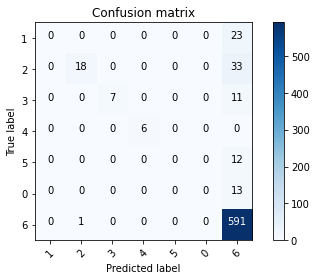

In [ ]:
best_params = grid.best_params_

pl_random_forest_tf_idf = Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                         ('clf', RandomForestClassifier(
                             random_state=42,
                             n_estimators=best_params['clf__n_estimators'],
                             max_features=best_params['clf__max_features'],
                             max_depth=best_params['clf__max_depth'],
                             criterion=best_params['clf__criterion'])
                         )])
pl_random_forest_tf_idf.fit(X_train, y_train)

pred = pl_random_forest_tf_idf.predict(TEST_DATA['text'])
evaluate_model(pl_random_forest_tf_idf, pred, TEST_DATA['label'])

conf = confusion_matrix(TEST_DATA['label'], pred)
plot_confusion_matrix(conf, y.unique())

## Árvore de Decisão

In [ ]:
pl_dec_tree_tf_idf = Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                         ('clf', DecisionTreeClassifier())])

params = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(estimator=pl_dec_tree_tf_idf, param_grid=params, scoring='f1_macro', cv=folds)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                            20, 30, 40, 50, 70, 90, 120, 150]},
             scoring='f1_macro')

In [ ]:
print(f'Melhor criterion: {grid.best_params_["clf__criterion"]}. Melhor max_depth: {grid.best_params_["clf__max_depth"]}.')
print(f'Resultou no F1 {grid.best_score_} durante o {folds}-fold')

Melhor criterion: entropy. Melhor max_depth: 40.
Resultou no F1 0.8720514965831005 durante o 10-fold


- Precision: 0.723940339791811
- Recall: 0.8915209798079393
- F1Score: 0.7904823963544286
- Acurácia: 0.9323467230443975


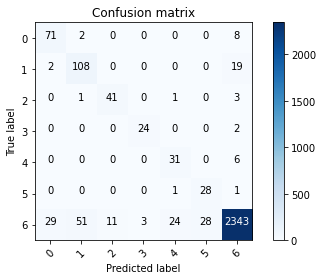

In [ ]:
best_params = grid.best_params_

pl_dec_tree_tf_idf = Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                         ('clf', DecisionTreeClassifier(criterion=best_params['clf__criterion'], max_depth=best_params['clf__max_depth']))])
pl_dec_tree_tf_idf.fit(X_train, y_train)

pred = pl_dec_tree_tf_idf.predict(TEST_DATA['text'])
evaluate_model(pl_dec_tree_tf_idf, pred, TEST_DATA['label'])

conf = confusion_matrix(TEST_DATA['label'], pred)
plot_confusion_matrix(conf, y.unique())

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
pl_xgb_tf_idf = Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                         ('clf', xgb.XGBClassifier(objective='multi:softmax', num_class=7))])

params = {'clf__min_child_weight': [1, 5], 'clf__subsample': [0.6, 0.8],
          'clf__colsample_bytree': [0.6, 1.0], 'clf__max_depth': [3, 4] }
grid = GridSearchCV(estimator=pl_xgb_tf_idf, param_grid=params, scoring='f1_macro', cv=folds)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                                       ('clf',
                                        XGBClassifier(num_class=7,
                                                      objective='multi:softmax'))]),
             param_grid={'clf__colsample_bytree': [0.6, 1.0],
                         'clf__max_depth': [3, 4],
                         'clf__min_child_weight': [1, 5],
                         'clf__subsample': [0.6, 0.8]},
             scoring='f1_macro')

In [ ]:
print(f'Melhor min_child_weight: {grid.best_params_["clf__min_child_weight"]}. Melhor colsample_bytree: {grid.best_params_["clf__colsample_bytree"]}.')
print(f'Melhor subsample: {grid.best_params_["clf__subsample"]}.  Melhor max_depth: {grid.best_params_["clf__max_depth"]}.')
print(f'Resultou no F1 {grid.best_score_} durante o {folds}-fold')


Melhor min_child_weight: 1. Melhor colsample_bytree: 0.6.
Melhor subsample: 0.8.  Melhor max_depth: 4.
Resultou no F1 0.9038229142424796 durante o 10-fold


In [ ]:
best_params = grid.best_params_

In [ ]:
pl_xgb_tf_idf = Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                         ('clf', xgb.XGBClassifier(
                             num_class=6,
                             objective='multi:softmax',
                             max_depth=best_params['clf__max_depth'],
                             subsample=best_params['clf__subsample'],
                             min_child_weight=best_params['clf__min_child_weight'],
                             colsample_bytree=best_params['clf__colsample_bytree'])
                         )])
pl_xgb_tf_idf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', Text2TfIdfTransformer()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.6, max_depth=4, num_class=6,
                               objective='multi:softprob', subsample=0.8))])

- Precision: 0.8580832332651711
- Recall: 0.8691329158607698
- F1Score: 0.8618881127247013
- Acurácia: 0.959830866807611


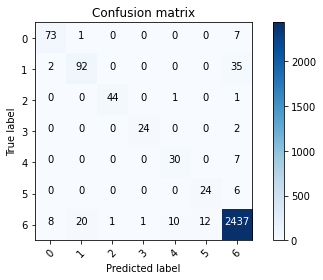

In [ ]:
pred = pl_xgb_tf_idf.predict(TEST_DATA['text'])
evaluate_model(pl_xgb_tf_idf, pred, TEST_DATA['label'])

conf = confusion_matrix(TEST_DATA['label'], pred)
plot_confusion_matrix(conf, y.unique())

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='rbf'))])

# defining parameter range
params = {'clf__C': [0.1, 1, 10, 100, 1000],
              'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'clf__kernel': ['rbf']}
 
grid = GridSearchCV(text_clf, params, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
print(f'Melhor C: {grid.best_params_["clf__C"]}. Melhor gamma: {grid.best_params_["clf__gamma"]}.')
print(f'Resultou no F1 {grid.best_score_} durante o {folds}-fold')

Melhor C: 100. Melhor gamma: 0.01.
Resultou no F1 0.9567723164966069 durante o 10-fold


In [ ]:
best_params = grid.best_params_

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(
    kernel='rbf', gamma=best_params["clf__gamma"], C=best_params["clf__C"]))])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=100, gamma=0.01))])

- Precision: 0.8650445886455674
- Recall: 0.9384197388642156
- F1Score: 0.8988024840135689
- Acurácia: 0.9675828047921071


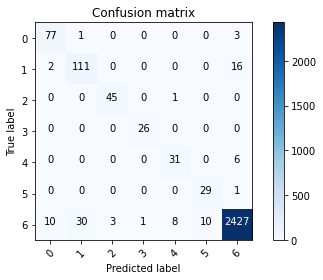

In [ ]:
pred = text_clf.predict(TEST_DATA['text'])
evaluate_model(text_clf, pred, TEST_DATA['label'])

conf = confusion_matrix(TEST_DATA['label'], pred)
plot_confusion_matrix(conf, y.unique())

# Bertimbau

In [ ]:
!pip3 install transformers

In [ ]:
import csv
import random
import nltk
nltk.download('punkt')


In [ ]:
import os
import torch
import torch.nn as nn
from torch import optim
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from torch.utils.data import DataLoader
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
% matplotlib inline

In [ ]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

## Preparando o Conjunto de dados. 

In [ ]:
## Objeto = 0
## qualificação = 1
## prazo pagamento = 2
## clausula = 3
## prazo entrega = 4
## local entrega/exec = 5
## outros = 6

Instanciando parânetros da rede neural

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nclasses = 7
nepochs = 4
batch_size = 8
batch_status = 32
learning_rate = 1e-5

max_length = 128
write_path = 'model'

Separando os dados em batches

In [ ]:
traindata = DataLoader(treino, batch_size=batch_size, shuffle=True)
testdata = DataLoader(teste, batch_size=batch_size, shuffle=True)
validationdata = DataLoader(validacao, batch_size=batch_size, shuffle=True)

Inicilizando tokenizador, modelo, função de erro e otimizador:

In [ ]:
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased', do_lower_case=False)
model = BertForSequenceClassification.from_pretrained('neuralmind/bert-large-portuguese-cased',
                                                      num_labels=nclasses,
                                                      output_attentions = False,
                                                      output_hidden_states = False).to(device)
model.cuda()

optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

Definindo método de avaliação

In [ ]:
def classification_report(y, predicoes):
  acc = accuracy_score(y, predicoes) * 100
  recall = recall_score(y, predicoes, average='weighted') * 100
  f1 = f1_score(y, predicoes, average='weighted') * 100
  precision = precision_score(y, predicoes, average='weighted') * 100
  return "Acurácia: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%%\nPrecision: %.2f%%" % (acc, recall, f1, precision)


In [ ]:
def predict(model, texts):
  inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)
  output = model(**inputs)
  return torch.argmax(output.logits, 1)

In [ ]:
def evaluate(model, testdata):
  model.eval()
  y_real, y_pred = [], []
  for batch_idx, inp in enumerate(testdata):
    texts, labels = inp['X'], inp['y']
                  
    pred_labels = predict(model, texts)
    
    ##
    ##labels = np.asarray(labels)
    ##labels = torch.from_numpy(labels.astype('int'))
    ##
    y_real.extend(labels.tolist())
    y_pred.extend(pred_labels.tolist())
    
    if (batch_idx+1) % batch_status == 0:
      print('Progress:', round(batch_idx / len(testdata), 2), batch_idx)
  
  print(classification_report(y_real, y_pred))
  f1 = f1_score(y_real, y_pred, average='weighted')
  acc = accuracy_score(y_real, y_pred)
  return f1, acc

Treinamento

In [ ]:
max_f1, repeat = 0, 0
status = []
for epoch in range(nepochs):
  model.train()
  losses = []
  train_loss = 0

  for batch_idx, inp in enumerate(traindata):
    texts, labels = inp['X'], inp['y']

    # treino
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)
    output = model(**inputs, labels=labels.to(device))

    # Calculate loss
    loss = output.loss
    losses.append(float(loss))

    train_loss += loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Display
    if (batch_idx+1) % batch_status == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tTotal Loss: {:.6f}'.format(epoch, \
        batch_idx+1, len(traindata), 100. * batch_idx / len(traindata), 
        float(loss), round(sum(losses) / len(losses), 5)))
  
  avg_train_loss = train_loss / len(traindata)  
  
  val_loss = 0
  model.eval()
  for batch_idx, inp in enumerate(validationdata):
    texts, labels = inp['X'], inp['y']

    with torch.no_grad():  
      # validação
      inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)
      output = model(**inputs, labels=labels.to(device))

      loss = output.loss
      val_loss += loss.item()

  avg_val_loss = val_loss / len(validationdata)

  status.append(
        {
            'epoch': epoch + 1,
            'training': round(avg_train_loss, 3),
            'validation': round(avg_val_loss,3)
        }
    )

  f1, acc = evaluate(model, validationdata)
  print('F1: ', f1, 'Accuracy: ', acc)
  if f1 > max_f1:
    model.save_pretrained("model")
    max_f1 = f1
    repeat = 0
    print('Saving best model...')

Train Epoch: 0 [32/300 (10%)]	Loss: 1.519149	Total Loss: 1.610290
Train Epoch: 0 [64/300 (21%)]	Loss: 1.157961	Total Loss: 1.419120
Train Epoch: 0 [96/300 (32%)]	Loss: 1.315635	Total Loss: 1.272880
Train Epoch: 0 [128/300 (42%)]	Loss: 0.537916	Total Loss: 1.136200
Train Epoch: 0 [160/300 (53%)]	Loss: 0.411899	Total Loss: 1.003580
Train Epoch: 0 [192/300 (64%)]	Loss: 0.188218	Total Loss: 0.889820
Train Epoch: 0 [224/300 (74%)]	Loss: 0.166870	Total Loss: 0.800910
Train Epoch: 0 [256/300 (85%)]	Loss: 0.218716	Total Loss: 0.733460
Train Epoch: 0 [288/300 (96%)]	Loss: 0.073893	Total Loss: 0.679920
Progress: 0.17 31
Progress: 0.35 63
Progress: 0.53 95
Progress: 0.71 127
Progress: 0.89 159
Acurácia: 91.46%
Recall: 91.46%
F1-score: 92.68%
Precision: 95.35%
F1:  0.9268499063113548 Accuracy:  0.9146083274523642
Saving best model...
Train Epoch: 1 [32/300 (10%)]	Loss: 0.056357	Total Loss: 0.149320
Train Epoch: 1 [64/300 (21%)]	Loss: 0.094612	Total Loss: 0.153720
Train Epoch: 1 [96/300 (32%)]	Loss

In [ ]:
df_stats = pd.DataFrame(data=status)
df_status = df_stats.set_index('epoch')
df_status.head()

,training,validation
epoch,,
1,0.661,0.291
2,0.135,0.141
3,0.063,0.102
4,0.051,0.078


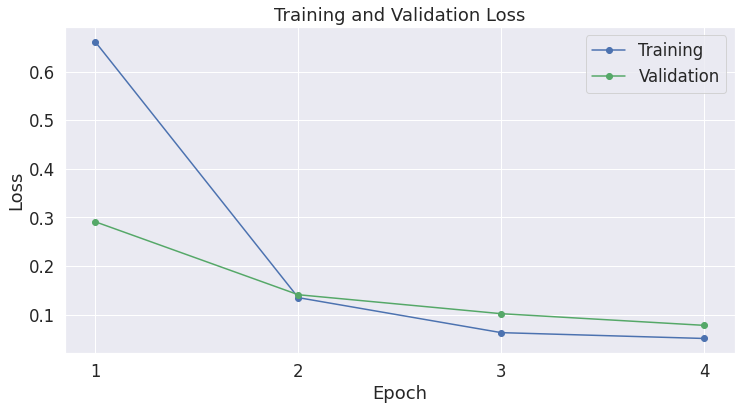

In [ ]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_status['training'], 'b-o', label="Training")
plt.plot(df_status['validation'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(1, nepochs + 1)))

plt.show()

In [ ]:
evaluate(model, testdata)


Progress: 0.09 31
Progress: 0.18 63
Progress: 0.27 95
Progress: 0.36 127
Progress: 0.45 159
Progress: 0.54 191
Progress: 0.63 223
Progress: 0.72 255
Progress: 0.81 287
Progress: 0.9 319
Progress: 0.99 351
Acurácia: 97.00%
Recall: 97.00%
F1-score: 97.10%
Precision: 97.33%


(0.9709661663293732, 0.9700493305144468)

In [ ]:
predicoes = []
Y = []
for i in teste:
  predicoes.append(predict(model, i['X']).tolist()[0])
  Y.append(i['y'])
print(classification_report(Y, predicoes))

Acurácia: 97.00%
Recall: 97.00%
F1-score: 97.10%
Precision: 97.33%


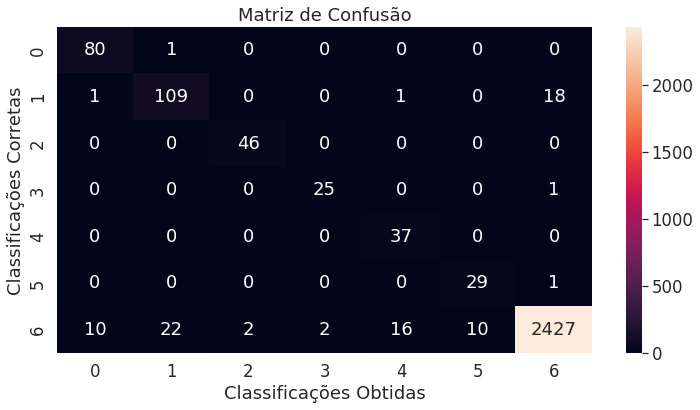

In [ ]:
cm = confusion_matrix(Y, predicoes)

ax = sns.heatmap(cm, annot=True, fmt='g');

ax.set_title('Matriz de Confusão');
ax.set_xlabel('Classificações Obtidas')
ax.set_ylabel('Classificações Corretas');
plt.show()

# Download

In [ ]:
!zip -r '/content/model.zip' '/content/model'

  adding: content/model/ (stored 0%)
  adding: content/model/pytorch_model.bin (deflated 7%)
  adding: content/model/config.json (deflated 56%)


In [ ]:
from google.colab import files

files.download("/content/model.zip")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!cp -r "./model.zip" "/content/drive/MyDrive"

Mounted at /content/drive
